In [13]:
from statsmodels.regression.rolling import RollingOLS
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
from datetime import datetime, date
warnings.filterwarnings('ignore')

# Get SPY Data

In [14]:
import requests

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = {
    "User-Agent": "Chrome/117.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)

In [15]:
df_list = pd.read_html(response.text)
sp500 = df_list[0]

In [16]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()

In [17]:
end_date = datetime.now().strftime('%Y-%m-%d')
end_date = pd.to_datetime(end_date)

start_date = end_date - pd.DateOffset(365*8)

In [18]:
start_date

Timestamp('2017-10-27 00:00:00')

In [19]:
df = yf.download(tickers=symbols_list, start=start_date, end=end_date)

[*********************100%***********************]  503 of 503 completed

1 Failed download:
['CVX']: Timeout('Failed to perform, curl: (28) Operation timed out after 10001 milliseconds with 1008 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


In [20]:
df = df.stack()
df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

In [21]:
df

Price              adj close       close        high         low        open  \
date       ticker                                                              
2017-10-27 A             NaN   63.988937   64.026595   63.461739   63.838305   
           AAPL          NaN   38.085075   38.213545   37.069005   37.206816   
           ABBV          NaN   65.298813   67.458156   64.460647   65.845749   
           ABT           NaN   48.108864   48.326079   47.943781   48.213130   
           ACGL          NaN   31.604698   31.966041   31.500099   31.896304   
...                      ...         ...         ...         ...         ...   
2025-10-24 XYZ           NaN   79.540001   80.379997   79.200996   79.800003   
           YUM           NaN  143.360001  147.210007  143.139999  146.070007   
           ZBH           NaN  103.029999  104.150002  102.430000  103.709999   
           ZBRA          NaN  308.820007  320.880005  308.470001  318.480011   
           ZTS           NaN  145.940002  147.490005  145.910004  147.119995   

Price                   volume  
date       ticker               
2017-10-27 A         1441000.0  
           AAPL    177816800.0  
           ABBV      9066300.0  
           ABT       4724300.0  
           ACGL      1863900.0  
...                        ...  
2025-10-24 XYZ       3860300.0  
           YUM       1289100.0  
           ZBH       1118400.0  
           ZBRA       601000.0  
           ZTS       1375100.0  

[989911 rows x 6 columns]

# Calculate features and technical indicators for each stock

## Garman-Klass Volaitlity

In [22]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2*np.log(2)-1)*((np.log(df['close']))-np.log(df['open'])**2)

In [23]:
df

Price              adj close       close        high         low        open  \
date       ticker                                                              
2017-10-27 A             NaN   63.988937   64.026595   63.461739   63.838305   
           AAPL          NaN   38.085075   38.213545   37.069005   37.206816   
           ABBV          NaN   65.298813   67.458156   64.460647   65.845749   
           ABT           NaN   48.108864   48.326079   47.943781   48.213130   
           ACGL          NaN   31.604698   31.966041   31.500099   31.896304   
...                      ...         ...         ...         ...         ...   
2025-10-24 XYZ           NaN   79.540001   80.379997   79.200996   79.800003   
           YUM           NaN  143.360001  147.210007  143.139999  146.070007   
           ZBH           NaN  103.029999  104.150002  102.430000  103.709999   
           ZBRA          NaN  308.820007  320.880005  308.470001  318.480011   
           ZTS           NaN  145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol  
date       ticker                                 
2017-10-27 A         1441000.0          5.066894  
           AAPL    177816800.0          3.646769  
           ABBV      9066300.0          5.159852  
           ABT       4724300.0          4.306075  
           ACGL      1863900.0          3.297336  
...                        ...               ...  
2025-10-24 XYZ       3860300.0          5.718798  
           YUM       1289100.0          7.678285  
           ZBH       1118400.0          6.532151  
           ZBRA       601000.0         10.618411  
           ZTS       1375100.0          7.698660  

[989911 rows x 7 columns]

In [24]:
df['rsi'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

In [25]:
df

Price              adj close       close        high         low        open  \
date       ticker                                                              
2017-10-27 A             NaN   63.988937   64.026595   63.461739   63.838305   
           AAPL          NaN   38.085075   38.213545   37.069005   37.206816   
           ABBV          NaN   65.298813   67.458156   64.460647   65.845749   
           ABT           NaN   48.108864   48.326079   47.943781   48.213130   
           ACGL          NaN   31.604698   31.966041   31.500099   31.896304   
...                      ...         ...         ...         ...         ...   
2025-10-24 XYZ           NaN   79.540001   80.379997   79.200996   79.800003   
           YUM           NaN  143.360001  147.210007  143.139999  146.070007   
           ZBH           NaN  103.029999  104.150002  102.430000  103.709999   
           ZBRA          NaN  308.820007  320.880005  308.470001  318.480011   
           ZTS           NaN  145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol        rsi  
date       ticker                                            
2017-10-27 A         1441000.0          5.066894        NaN  
           AAPL    177816800.0          3.646769        NaN  
           ABBV      9066300.0          5.159852        NaN  
           ABT       4724300.0          4.306075        NaN  
           ACGL      1863900.0          3.297336        NaN  
...                        ...               ...        ...  
2025-10-24 XYZ       3860300.0          5.718798  56.282040  
           YUM       1289100.0          7.678285  44.447479  
           ZBH       1118400.0          6.532151  56.676137  
           ZBRA       601000.0         10.618411  52.116676  
           ZTS       1375100.0          7.698660  49.059855  

[989911 rows x 8 columns]

<Axes: xlabel='date'>

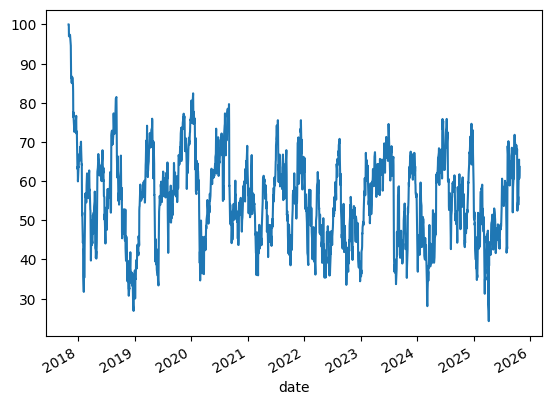

In [26]:
df.xs('AAPL', level=1)['rsi'].plot()

In [61]:
# drop adj close since we get nan values
df.drop(columns=['adj close'], inplace=True)

# Bollinger bands

In [62]:
df['bb_low'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_upper'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

In [63]:
df

Price                   close        high         low        open  \
date       ticker                                                   
2017-10-27 A        63.988937   64.026595   63.461739   63.838305   
           AAPL     38.085075   38.213545   37.069005   37.206816   
           ABBV     65.298813   67.458156   64.460647   65.845749   
           ABT      48.108864   48.326079   47.943781   48.213130   
           ACGL     31.604698   31.966041   31.500099   31.896304   
...                       ...         ...         ...         ...   
2025-10-24 XYZ      79.540001   80.379997   79.200996   79.800003   
           YUM     143.360001  147.210007  143.139999  146.070007   
           ZBH     103.029999  104.150002  102.430000  103.709999   
           ZBRA    308.820007  320.880005  308.470001  318.480011   
           ZTS     145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-10-27 A         1441000.0          5.066894        NaN       NaN   
           AAPL    177816800.0          3.646769        NaN       NaN   
           ABBV      9066300.0          5.159852        NaN       NaN   
           ABT       4724300.0          4.306075        NaN       NaN   
           ACGL      1863900.0          3.297336        NaN       NaN   
...                        ...               ...        ...       ...   
2025-10-24 XYZ       3860300.0          5.718798  56.282040  4.292301   
           YUM       1289100.0          7.678285  44.447479  4.943903   
           ZBH       1118400.0          6.532151  56.676137  4.560349   
           ZBRA       601000.0         10.618411  52.116676  5.637544   
           ZTS       1375100.0          7.698660  49.059855  4.954989   

Price                bb_mid  bb_upper       atr      macd  dollar_volume  
date       ticker                                                         
2017-10-27 A            NaN       NaN       NaN       NaN      92.208059  
           AAPL         NaN       NaN       NaN       NaN    6772.166232  
           ABBV         NaN       NaN       NaN       NaN     592.018627  
           ABT          NaN       NaN       NaN       NaN     227.280705  
           ACGL         NaN       NaN       NaN       NaN      58.907997  
...                     ...       ...       ...       ...            ...  
2025-10-24 XYZ     4.352152  4.412004 -0.617390  0.078274     307.048266  
           YUM     4.996344  5.048786  1.142625 -0.573217     184.805377  
           ZBH     4.611826  4.663304 -0.523415  0.347980     115.228751  
           ZBRA    5.698633  5.759722  0.287544 -0.144466     185.600824  
           ZTS     4.980480  5.005972 -0.552363 -0.256178     200.682097  

[989911 rows x 13 columns]

# ATR

In [64]:
def calculate_atr(stock_data):
    atr = pandas_ta.atr(
        high=stock_data['high'],
        low=stock_data['low'],
        close=stock_data['close'],
        length=14
    )

    return atr.sub(atr.mean()).div(atr.std())

In [65]:
df['atr'] = df.groupby(level=1, group_keys=False).apply(calculate_atr)
df

Price                   close        high         low        open  \
date       ticker                                                   
2017-10-27 A        63.988937   64.026595   63.461739   63.838305   
           AAPL     38.085075   38.213545   37.069005   37.206816   
           ABBV     65.298813   67.458156   64.460647   65.845749   
           ABT      48.108864   48.326079   47.943781   48.213130   
           ACGL     31.604698   31.966041   31.500099   31.896304   
...                       ...         ...         ...         ...   
2025-10-24 XYZ      79.540001   80.379997   79.200996   79.800003   
           YUM     143.360001  147.210007  143.139999  146.070007   
           ZBH     103.029999  104.150002  102.430000  103.709999   
           ZBRA    308.820007  320.880005  308.470001  318.480011   
           ZTS     145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-10-27 A         1441000.0          5.066894        NaN       NaN   
           AAPL    177816800.0          3.646769        NaN       NaN   
           ABBV      9066300.0          5.159852        NaN       NaN   
           ABT       4724300.0          4.306075        NaN       NaN   
           ACGL      1863900.0          3.297336        NaN       NaN   
...                        ...               ...        ...       ...   
2025-10-24 XYZ       3860300.0          5.718798  56.282040  4.292301   
           YUM       1289100.0          7.678285  44.447479  4.943903   
           ZBH       1118400.0          6.532151  56.676137  4.560349   
           ZBRA       601000.0         10.618411  52.116676  5.637544   
           ZTS       1375100.0          7.698660  49.059855  4.954989   

Price                bb_mid  bb_upper       atr      macd  dollar_volume  
date       ticker                                                         
2017-10-27 A            NaN       NaN       NaN       NaN      92.208059  
           AAPL         NaN       NaN       NaN       NaN    6772.166232  
           ABBV         NaN       NaN       NaN       NaN     592.018627  
           ABT          NaN       NaN       NaN       NaN     227.280705  
           ACGL         NaN       NaN       NaN       NaN      58.907997  
...                     ...       ...       ...       ...            ...  
2025-10-24 XYZ     4.352152  4.412004 -0.617390  0.078274     307.048266  
           YUM     4.996344  5.048786  1.142625 -0.573217     184.805377  
           ZBH     4.611826  4.663304 -0.523415  0.347980     115.228751  
           ZBRA    5.698633  5.759722  0.287544 -0.144466     185.600824  
           ZTS     4.980480  5.005972 -0.552363 -0.256178     200.682097  

[989911 rows x 13 columns]

# MACD

In [66]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    
    return macd.sub(macd.mean()).div(macd.std())

In [67]:
df['macd'] = df.groupby(level=1, group_keys=False)['close'].apply(compute_macd)

In [68]:
df

Price                   close        high         low        open  \
date       ticker                                                   
2017-10-27 A        63.988937   64.026595   63.461739   63.838305   
           AAPL     38.085075   38.213545   37.069005   37.206816   
           ABBV     65.298813   67.458156   64.460647   65.845749   
           ABT      48.108864   48.326079   47.943781   48.213130   
           ACGL     31.604698   31.966041   31.500099   31.896304   
...                       ...         ...         ...         ...   
2025-10-24 XYZ      79.540001   80.379997   79.200996   79.800003   
           YUM     143.360001  147.210007  143.139999  146.070007   
           ZBH     103.029999  104.150002  102.430000  103.709999   
           ZBRA    308.820007  320.880005  308.470001  318.480011   
           ZTS     145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-10-27 A         1441000.0          5.066894        NaN       NaN   
           AAPL    177816800.0          3.646769        NaN       NaN   
           ABBV      9066300.0          5.159852        NaN       NaN   
           ABT       4724300.0          4.306075        NaN       NaN   
           ACGL      1863900.0          3.297336        NaN       NaN   
...                        ...               ...        ...       ...   
2025-10-24 XYZ       3860300.0          5.718798  56.282040  4.292301   
           YUM       1289100.0          7.678285  44.447479  4.943903   
           ZBH       1118400.0          6.532151  56.676137  4.560349   
           ZBRA       601000.0         10.618411  52.116676  5.637544   
           ZTS       1375100.0          7.698660  49.059855  4.954989   

Price                bb_mid  bb_upper       atr      macd  dollar_volume  
date       ticker                                                         
2017-10-27 A            NaN       NaN       NaN       NaN      92.208059  
           AAPL         NaN       NaN       NaN       NaN    6772.166232  
           ABBV         NaN       NaN       NaN       NaN     592.018627  
           ABT          NaN       NaN       NaN       NaN     227.280705  
           ACGL         NaN       NaN       NaN       NaN      58.907997  
...                     ...       ...       ...       ...            ...  
2025-10-24 XYZ     4.352152  4.412004 -0.617390  0.078274     307.048266  
           YUM     4.996344  5.048786  1.142625 -0.573217     184.805377  
           ZBH     4.611826  4.663304 -0.523415  0.347980     115.228751  
           ZBRA    5.698633  5.759722  0.287544 -0.144466     185.600824  
           ZTS     4.980480  5.005972 -0.552363 -0.256178     200.682097  

[989911 rows x 13 columns]

# Dollar volume

In [69]:
df['dollar_volume'] = (df['close']*df['volume'])/1e6

In [70]:
df

Price                   close        high         low        open  \
date       ticker                                                   
2017-10-27 A        63.988937   64.026595   63.461739   63.838305   
           AAPL     38.085075   38.213545   37.069005   37.206816   
           ABBV     65.298813   67.458156   64.460647   65.845749   
           ABT      48.108864   48.326079   47.943781   48.213130   
           ACGL     31.604698   31.966041   31.500099   31.896304   
...                       ...         ...         ...         ...   
2025-10-24 XYZ      79.540001   80.379997   79.200996   79.800003   
           YUM     143.360001  147.210007  143.139999  146.070007   
           ZBH     103.029999  104.150002  102.430000  103.709999   
           ZBRA    308.820007  320.880005  308.470001  318.480011   
           ZTS     145.940002  147.490005  145.910004  147.119995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-10-27 A         1441000.0          5.066894        NaN       NaN   
           AAPL    177816800.0          3.646769        NaN       NaN   
           ABBV      9066300.0          5.159852        NaN       NaN   
           ABT       4724300.0          4.306075        NaN       NaN   
           ACGL      1863900.0          3.297336        NaN       NaN   
...                        ...               ...        ...       ...   
2025-10-24 XYZ       3860300.0          5.718798  56.282040  4.292301   
           YUM       1289100.0          7.678285  44.447479  4.943903   
           ZBH       1118400.0          6.532151  56.676137  4.560349   
           ZBRA       601000.0         10.618411  52.116676  5.637544   
           ZTS       1375100.0          7.698660  49.059855  4.954989   

Price                bb_mid  bb_upper       atr      macd  dollar_volume  
date       ticker                                                         
2017-10-27 A            NaN       NaN       NaN       NaN      92.208059  
           AAPL         NaN       NaN       NaN       NaN    6772.166232  
           ABBV         NaN       NaN       NaN       NaN     592.018627  
           ABT          NaN       NaN       NaN       NaN     227.280705  
           ACGL         NaN       NaN       NaN       NaN      58.907997  
...                     ...       ...       ...       ...            ...  
2025-10-24 XYZ     4.352152  4.412004 -0.617390  0.078274     307.048266  
           YUM     4.996344  5.048786  1.142625 -0.573217     184.805377  
           ZBH     4.611826  4.663304 -0.523415  0.347980     115.228751  
           ZBRA    5.698633  5.759722  0.287544 -0.144466     185.600824  
           ZTS     4.980480  5.005972 -0.552363 -0.256178     200.682097  

[989911 rows x 13 columns]

# Aggregate to monthly level

In [71]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low']]

In [72]:
df.unstack()[last_cols].resample('M').last().stack('ticker')

Price                   close  garman_klass_vol         rsi    bb_low  \
date       ticker                                                       
2017-10-31 A        64.045441          5.063241    5.590245       NaN   
           AAPL     39.484234          3.780656  100.000000       NaN   
           ABBV     64.105507          5.102141    0.000000       NaN   
           ABT      47.118370          4.259252    0.000000       NaN   
           ACGL     31.582510          3.274602   92.307655       NaN   
...                       ...               ...         ...       ...   
2025-10-31 XYZ      79.540001          5.718798   56.282040  4.292301   
           YUM     143.360001          7.678285   44.447479  4.943903   
           ZBH     103.029999          6.532151   56.676137  4.560349   
           ZBRA    308.820007         10.618411   52.116676  5.637544   
           ZTS     145.940002          7.698660   49.059855  4.954989   

Price                bb_mid  bb_upper       atr      macd  
date       ticker                                          
2017-10-31 A            NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2025-10-31 XYZ     4.352152  4.412004 -0.617390  0.078274  
           YUM     4.996344  5.048786  1.142625 -0.573217  
           ZBH     4.611826  4.663304 -0.523415  0.347980  
           ZBRA    5.698633  5.759722  0.287544 -0.144466  
           ZTS     4.980480  5.005972 -0.552363 -0.256178  

[47795 rows x 8 columns]

In [73]:
data = pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack().to_frame('dollar_volume'),
df.unstack()[last_cols].resample('M').last().stack('ticker')], axis=1).dropna()

In [74]:
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-12-31 A          113.803446   63.187096          5.064163  40.741750   
           AAPL      4279.757006   39.670704          3.832944  59.928409   
           ABBV       294.333530   68.694099          5.325135  45.563968   
           ABT        312.721550   49.585945          4.406720  43.256666   
           ACGL        38.856473   28.771019          3.068069  39.727363   
...                          ...         ...               ...        ...   
2025-10-31 GEHC       200.171878   78.139999          5.630510  59.057167   
           KVUE       477.686879   15.000000          1.820373  36.622280   
           VLTO       134.282386  104.650002          6.581090  50.247585   
           SOLV        67.791749   71.440002          5.454815  45.897041   
           GEV       1984.233807  584.390015         13.405126  45.246958   

                     bb_low    bb_mid  bb_upper       atr      macd  
date       ticker                                                    
2017-12-31 A       4.142018  4.161780  4.181542 -1.788513 -0.183390  
           AAPL    3.694565  3.720651  3.746737 -1.461415 -0.276446  
           ABBV    4.219226  4.244645  4.270064 -1.205924  0.033413  
           ABT     3.865640  3.903622  3.941605 -1.843092  0.153291  
           ACGL    3.369323  3.400144  3.430966 -1.293592 -0.656634  
...                     ...       ...       ...       ...       ...  
2025-10-31 GEHC    4.276927  4.327562  4.378197 -0.429944  0.197403  
           KVUE    2.732913  2.816500  2.900087  1.330551 -1.729353  
           VLTO    4.620714  4.654756  4.688797 -0.561026 -0.750986  
           SOLV    4.267168  4.295366  4.323564 -1.036534 -0.214858  
           GEV     6.348176  6.409725  6.471273  2.072630 -1.381252  

[46810 rows x 9 columns]

## Calculate 5-year rolling average of dollar volume for each stock before filtering

In [75]:
data['dollar_volume'] = (data['dollar_volume'].unstack('ticker').rolling(5*12).mean().stack())

In [76]:
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-12-31 A                 NaN   63.187096          5.064163  40.741750   
           AAPL              NaN   39.670704          3.832944  59.928409   
           ABBV              NaN   68.694099          5.325135  45.563968   
           ABT               NaN   49.585945          4.406720  43.256666   
           ACGL              NaN   28.771019          3.068069  39.727363   
...                          ...         ...               ...        ...   
2025-10-31 GEHC              NaN   78.139999          5.630510  59.057167   
           KVUE              NaN   15.000000          1.820373  36.622280   
           VLTO              NaN  104.650002          6.581090  50.247585   
           SOLV              NaN   71.440002          5.454815  45.897041   
           GEV               NaN  584.390015         13.405126  45.246958   

                     bb_low    bb_mid  bb_upper       atr      macd  
date       ticker                                                    
2017-12-31 A       4.142018  4.161780  4.181542 -1.788513 -0.183390  
           AAPL    3.694565  3.720651  3.746737 -1.461415 -0.276446  
           ABBV    4.219226  4.244645  4.270064 -1.205924  0.033413  
           ABT     3.865640  3.903622  3.941605 -1.843092  0.153291  
           ACGL    3.369323  3.400144  3.430966 -1.293592 -0.656634  
...                     ...       ...       ...       ...       ...  
2025-10-31 GEHC    4.276927  4.327562  4.378197 -0.429944  0.197403  
           KVUE    2.732913  2.816500  2.900087  1.330551 -1.729353  
           VLTO    4.620714  4.654756  4.688797 -0.561026 -0.750986  
           SOLV    4.267168  4.295366  4.323564 -1.036534 -0.214858  
           GEV     6.348176  6.409725  6.471273  2.072630 -1.381252  

[46810 rows x 9 columns]

In [77]:
data['dollar_volume_rank'] = data.groupby(level=0)['dollar_volume'].rank(ascending=False)

In [78]:
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'], axis=1)

In [79]:
data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2022-11-30 AAPL    145.971344          7.494303  50.717958  4.902024   
           ABBV    144.408646          7.574214  67.703088  4.854370   
           ABT     101.483543          6.379006  59.980870  4.521898   
           ACN     287.433350          9.981790  60.871623  5.513048   
           ADBE    344.929993         10.695928  57.841314  5.654176   
...                       ...               ...        ...       ...   
2025-10-31 MRNA     26.740000          2.881617  50.376135  3.274251   
           UBER     94.070000          6.261212  48.532375  4.517346   
           CRWD    527.320007         12.768423  63.273339  6.164268   
           DDOG    156.470001          7.973517  57.105328  4.978572   
           PLTR    184.630005          8.465246  57.232631  5.160338   

                     bb_mid  bb_upper       atr      macd  
date       ticker                                          
2022-11-30 AAPL    4.973065  5.044107  1.043974 -0.232431  
           ABBV    4.925881  4.997392  0.574903  1.341621  
           ABT     4.583473  4.645049  0.415861  0.966535  
           ACN     5.603903  5.694758  0.890831  1.107704  
           ADBE    5.779096  5.904017  0.073898  0.598442  
...                     ...       ...       ...       ...  
2025-10-31 MRNA    3.333941  3.393631 -0.861656  0.015930  
           UBER    4.568828  4.620311  1.217633 -0.658512  
           CRWD    6.213241  6.262214  1.499557  1.265001  
           DDOG    5.052888  5.127204  0.268874  0.841644  
           PLTR    5.200802  5.241267  2.549847  0.488264  

[5364 rows x 8 columns]

# Calculate monthly returns for different time horizons as features

This is done because we may want to capture time series dynamics for things such as the momentum of a stock.

In [80]:
#df['pct_change'] = df['close'].pct_change()

In [81]:
g = df.xs('AAPL', level=1)

In [82]:
def calculate_returns(df):
    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['close'] 
            .pct_change(lag)
            .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper=x.quantile(1-outlier_cutoff)))
            .add(1)
            .pow(1/lag)
            .sub(1))
        
    return df

In [83]:
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

In [84]:
data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2023-11-30 AAPL    188.355316          8.574139  62.715619  5.172097   
           ABBV    132.727570          7.225300  51.608069  4.849798   
           ABT     100.348068          6.406093  66.470118  4.490710   
           ACN     323.254211         10.680551  65.329800  5.699981   
           ADBE    611.010010         13.492144  62.481317  6.327316   
...                       ...               ...        ...       ...   
2025-10-31 ZTS     145.940002          7.698660  49.059855  4.954989   
           MRNA     26.740000          2.881617  50.376135  3.274251   
           UBER     94.070000          6.261212  48.532375  4.517346   
           CRWD    527.320007         12.768423  63.273339  6.164268   
           DDOG    156.470001          7.973517  57.105328  4.978572   

                     bb_mid  bb_upper       atr      macd  return_1m  \
date       ticker                                                      
2023-11-30 AAPL    5.224556  5.277015 -0.268772  1.072642   0.113780   
           ABBV    4.875313  4.900828 -0.216612 -0.780579   0.008571   
           ABT     4.564342  4.637975 -0.283744  1.369693   0.103014   
           ACN     5.753182  5.806383 -0.350625  1.341928   0.117530   
           ADBE    6.394875  6.462435  0.543342  1.790733   0.148386   
...                     ...       ...       ...       ...        ...   
2025-10-31 ZTS     4.980480  5.005972 -0.552363 -0.256178  -0.002597   
           MRNA    3.333941  3.393631 -0.861656  0.015930   0.035230   
           UBER    4.568828  4.620311  1.217633 -0.658512  -0.039808   
           CRWD    6.213241  6.262214  1.499557  1.265001   0.075329   
           DDOG    5.052888  5.127204  0.268874  0.841644   0.098806   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2023-11-30 AAPL     0.054001   0.004118   0.012050   0.029035    0.021471  
           ABBV    -0.017750  -0.007184   0.008804  -0.005274   -0.006195  
           ABT      0.040567   0.006333   0.005433   0.004481   -0.000937  
           ACN      0.043675   0.010949   0.015621   0.026847    0.009835  
           ADBE     0.094666   0.029890   0.065406   0.070978    0.048801  
...                      ...        ...        ...        ...         ...  
2025-10-31 ZTS     -0.034019   0.000343  -0.010920  -0.016657   -0.015974  
           MRNA     0.053567  -0.032868  -0.010799  -0.042272   -0.058000  
           UBER     0.001705   0.023453   0.025224   0.038684    0.022472  
           CRWD     0.115598   0.050730   0.035042   0.031735    0.049041  
           DDOG     0.069949   0.037819   0.073245   0.010280    0.018587  

[3353 rows x 14 columns]

# Download Fama-French Factors and calculate rolling factor betas

In [85]:
import pandas_datareader.data as web

factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
    'famafrench',
    start='2010')[0].drop('RF', axis=1)

In [86]:
factor_data.index = factor_data.index.to_timestamp()

In [87]:
factor_data = factor_data.resample('M').last().div(100)

In [88]:
factor_data.index.name = 'date'

In [89]:
factor_data = factor_data.join(data['return_1m']).sort_index()

In [90]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2023-11-30 AAPL    0.0888 -0.0021  0.0167 -0.0373 -0.0108   0.113780
           ABBV    0.0888 -0.0021  0.0167 -0.0373 -0.0108   0.008571
           ABT     0.0888 -0.0021  0.0167 -0.0373 -0.0108   0.103014
           ACN     0.0888 -0.0021  0.0167 -0.0373 -0.0108   0.117530
           ADBE    0.0888 -0.0021  0.0167 -0.0373 -0.0108   0.148386
...                   ...     ...     ...     ...     ...        ...
2025-08-31 WFC     0.0185  0.0488  0.0441 -0.0069  0.0207   0.025211
           WMT     0.0185  0.0488  0.0441 -0.0069  0.0207  -0.007894
           XOM     0.0185  0.0488  0.0441 -0.0069  0.0207   0.033263
           XYZ     0.0185  0.0488  0.0441 -0.0069  0.0207   0.030805
           ZTS     0.0185  0.0488  0.0441 -0.0069  0.0207   0.072776

[3072 rows x 6 columns]